# Exercise 1: Logistic Regression

## Parts 1 and 2

In [5]:
!pip install -U scikit-learn
!pip install -U pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/97/d8/dc2f6bff06a799a5603c414afc6de39c6351fe34892d50b6a077df3be6ac/pandas-2.1.3-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     --- --------------------------------- 30.7/341.8 kB 660.6 kB/s eta 0:00:01
     ------------------- ------------------ 174.1/341.8 kB 2.1 MB/s eta 0:00:01
     -------------------------------------- 341.8/341.8 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.6 MB 15.4 MB/s eta 0:00:01
   ----- ---------------------------------- 1.6/10.6 MB 19.7 MB/s eta 0:00:01
   ------------ --------------------------- 3.2/10.6 MB 25.7 MB/s eta 0:00:01
   ----------------- ---------------------- 4.8/10.6 MB 27.6 MB/s eta 0:00:01
   --------------------- ------------------ 5.6/10.6 MB 25.6 MB/s eta 0:00:01
   ------------------

In [1]:
# Import libraries
import numpy as np
import sklearn.model_selection
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [3]:
train_data_vectors = train_dataset.data.view(-1, 784).float().numpy()
test_data_vectors = test_dataset.data.view(-1, 784).float().numpy()

train_labels = train_dataset.targets.numpy()
test_labels = test_dataset.targets.numpy()

# Only use first two classes of training data
Y_train = train_labels
filter = np.isin(Y_train, [0, 1])
X_train = train_data_vectors[filter]
Y_train = Y_train[filter]

# Only use first two classes of test data
Y_test = test_labels
filter = np.isin(Y_test, [0, 1])
X_test = test_data_vectors[filter]
Y_test = Y_test[filter]

# Convert 784x1 vectors into 2x1 vectors
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Standardize input
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

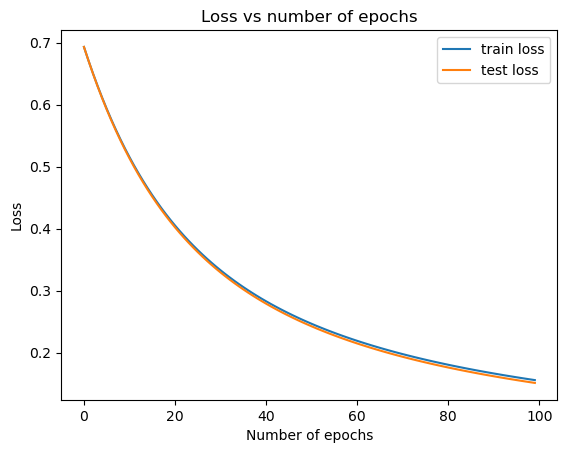

The final test error is 0.57%


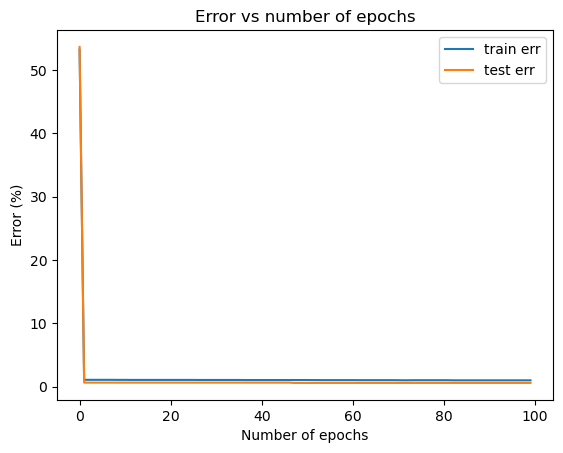

In [4]:
# Calculate sigmoid of value
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Predict output given input and weights
def predict(x, w, w_0):
    z = np.matmul(w, x.T) + w_0
    return sigmoid(z)

# Determine classifications based on output of predict function
def classify(x):
    x[x > 0.5] = 1
    x[x <= 0.5] = 0
    return x

# Determine log loss value, given actual output and calculated output
def calc_log_loss(y, y_new):
    return -(y*np.log(y_new)+(1-y)*np.log(1-y_new)).mean()

# Determine gradient of loss wrt w
def calc_grad_w(x, y, y_new):
    return (np.reshape(y_new-y,(len(x) ,1))*x).mean(axis = 0)

# Determine gradient of loss wrt w_0
def calc_grad_w_0(y, y_new):
    return (y_new-y).mean(axis = 0)

# Perform logarithmic regression
def log_reg(x_train, y_train, x_test, y_test, learning_rate, n_iter):
    train_losses = []
    test_losses = []
    train_errs = []
    test_errs = []
    w = np.zeros(x_train.shape[1])  #an array of weights for each x variables
    w_0 = 0
    for i in range(n_iter):
        # Determine predictions based on current weights
        res_train = predict(x_train,w,w_0)
        res_test = predict(x_test,w,w_0)

        # Calculate training and test loss at each epoch and store it 
        train_loss = calc_log_loss(y_train,res_train)
        train_losses.append(train_loss)

        test_loss = calc_log_loss(y_test,res_test)
        test_losses.append(test_loss)

        # Calculate gradients
        grad_w = calc_grad_w(x_train,y_train,res_train)
        grad_w_0 = calc_grad_w_0(y_train,res_train)

        # Update values
        w = w - learning_rate * grad_w
        w_0 = w_0 - learning_rate * grad_w_0

        # Determine classifications based on current weights
        class_train = classify(res_train)
        class_test = classify(res_test)

        # Determine and store accuracies
        train_err = 100 * np.mean(y_train != class_train)
        train_errs.append(train_err)
        test_err = 100 * np.mean(y_test != class_test)
        test_errs.append(test_err)

        # Break from loop if losses converge
        if len(train_losses) > 1 and np.abs(train_losses[i-1] - train_losses[i]) < 10e-7:
            print(f"Tolerance reached at epoch {i}")
            num_epochs = i
            break
    
    # Plot test and training losses vs the number of epochs
    plt.plot(train_losses)
    plt.plot(test_losses)
    plt.legend(['train loss', 'test loss'])
    plt.title("Loss vs number of epochs")
    plt.ylabel("Loss")
    plt.xlabel("Number of epochs")
    plt.show()

    # Plot test and training errors vs the number of epochs
    plt.figure()
    plt.plot(train_errs)
    plt.plot(test_errs)
    plt.legend(['train err', 'test err'])
    plt.title("Error vs number of epochs")
    plt.ylabel("Error (%)")
    plt.xlabel("Number of epochs")

    # Output the final test error
    print(f"The final test error is {test_errs[-1]:.2f}%")
    return [w, w_0]

weight = log_reg(X_train,Y_train, X_test, Y_test, 0.1, 100)


## Part 3

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Minimum Euclidean Distance (MED) Classifier
med = LinearDiscriminantAnalysis()
med.fit(X_train, Y_train)
med_pred = med.predict(X_test)

# Generalized Euclidean Distance (GED) Classifier
ged = QuadraticDiscriminantAnalysis()
ged.fit(X_train, Y_train)
ged_pred = ged.predict(X_test)

# k-Nearest Neighbors (kNN)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

# Evaluate and compare the models
models = ["MED", "GED", "kNN", "Logistic Regression"]
predictions = [med_pred, ged_pred, knn_pred, lr_pred]

for model, pred in zip(models, predictions):
    accuracy = accuracy_score(Y_test, pred)
    error = 1-accuracy
    print(f"\n{model} Classifier:")
    print(f"Error: {error:.4f}")


MED Classifier:
Error: 0.0061

GED Classifier:
Error: 0.0038

kNN Classifier:
Error: 0.0028

Logistic Regression Classifier:
Error: 0.0043
